# Perfiles individuales: `py` vs `jl`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
ids = np.sort([102, 115, 155, 161, 171, 22, 62, 64, 72, 98])
voidnames = [f'void_py_{idd}.csv' for idd in ids] + [f'void_jl_{idd}.csv' for idd in ids]

In [112]:
p = {n[5:-4]: pd.read_csv(n, names=["m", "nh","mball", "nhball"]) for n in voidnames}
ppy = {n[5:-4]: pd.read_csv(n, names=["m", "nh","mball", "nhball"]) for n in voidnames[:10]}
pjl = {n[5:-4]: pd.read_csv(n, names=["m", "nh","mball", "nhball"]) for n in voidnames[10:]}

In [115]:
for k in ppy.keys():
    print(k)
print('---')
for k in pjl.keys():
    print(k)

py_22
py_62
py_64
py_72
py_98
py_102
py_115
py_155
py_161
py_171
---
jl_22
jl_62
jl_64
jl_72
jl_98
jl_102
jl_115
jl_155
jl_161
jl_171


In [47]:
## params
RMIN, RMAX, NBINS = 0.0,5.0,50
nk = 100

In [122]:
def perfiles(p):
    meandenball   = (p.mball/(4*np.pi/3 * (5*RMAX)**3))
    meanhalosball = (p.nhball/(4*np.pi/3 * (5*RMAX)**3))
    
    DR = (RMAX-RMIN)/NBINS
    
    vol    = np.zeros(NBINS)
    volcum = np.zeros(NBINS)
    for k in range(NBINS):
        vol[k]    = ((k+1.0)*DR + RMIN)**3 - (k*DR + RMIN)**3
        volcum[k] = ((k+1.0)*DR + RMIN)**3
    
    vol    *= (4*np.pi/3)
    volcum *= (4*np.pi/3)
    
    Delta    = np.zeros(NBINS)
    DeltaCum = np.zeros(NBINS)
    DeltaHalos    = np.zeros(NBINS)
    DeltaHalosCum = np.zeros(NBINS)
    
    Delta    = (p.m/vol)/meandenball - 1
    DeltaCum = (np.cumsum(p.m)/volcum)/meandenball - 1
    DeltaHalos    = (p.nh/vol)/meanhalosball - 1
    DeltaHalosCum = (np.cumsum(p.nh)/volcum)/meanhalosball - 1

    return pd.DataFrame(np.array([Delta, DeltaCum, DeltaHalos, DeltaHalosCum]).T, columns=["delta", "delta_cum", "deltahalos", "deltahalos_cum"])

In [123]:
profs_py = [perfiles(pi) for pi in ppy.values()]
profs_jl = [perfiles(pi) for pi in pjl.values()]

In [157]:
cls = ["delta", "delta_cum", "deltahalos", "deltahalos_cum"]
i,j=1,1
profs_py[i][cls[j]]-profs_jl[i][cls[j]]

0     0.000000e+00
1     0.000000e+00
2     0.000000e+00
3     0.000000e+00
4     0.000000e+00
5    -6.465649e-08
6    -4.751197e-08
7    -3.539077e-08
8    -4.095162e-08
9    -1.047062e-07
10   -8.616562e-08
11   -8.169219e-08
12   -9.873198e-08
13   -1.234258e-07
14   -1.368045e-07
15   -1.445173e-07
16   -1.908388e-07
17   -1.908184e-07
18   -1.865390e-07
19   -1.825190e-07
20   -1.733609e-07
21   -1.648322e-07
22   -1.673283e-07
23   -1.649205e-07
24   -1.605824e-07
25   -1.575364e-07
26   -1.610924e-07
27   -1.568957e-07
28   -1.489818e-07
29   -1.432935e-07
30   -1.382766e-07
31   -1.338434e-07
32   -1.341467e-07
33   -1.295606e-07
34   -1.268651e-07
35   -1.294473e-07
36   -1.350833e-07
37   -1.375703e-07
38   -1.377909e-07
39   -1.407890e-07
40   -1.408366e-07
41   -1.402099e-07
42   -1.422674e-07
43   -1.438714e-07
44   -1.469795e-07
45   -1.468764e-07
46   -1.456875e-07
47   -1.494965e-07
48   -1.508838e-07
49   -1.515080e-07
Name: delta_cum, dtype: float64

Text(0.5, 1.0, 'haloscum py-jl')

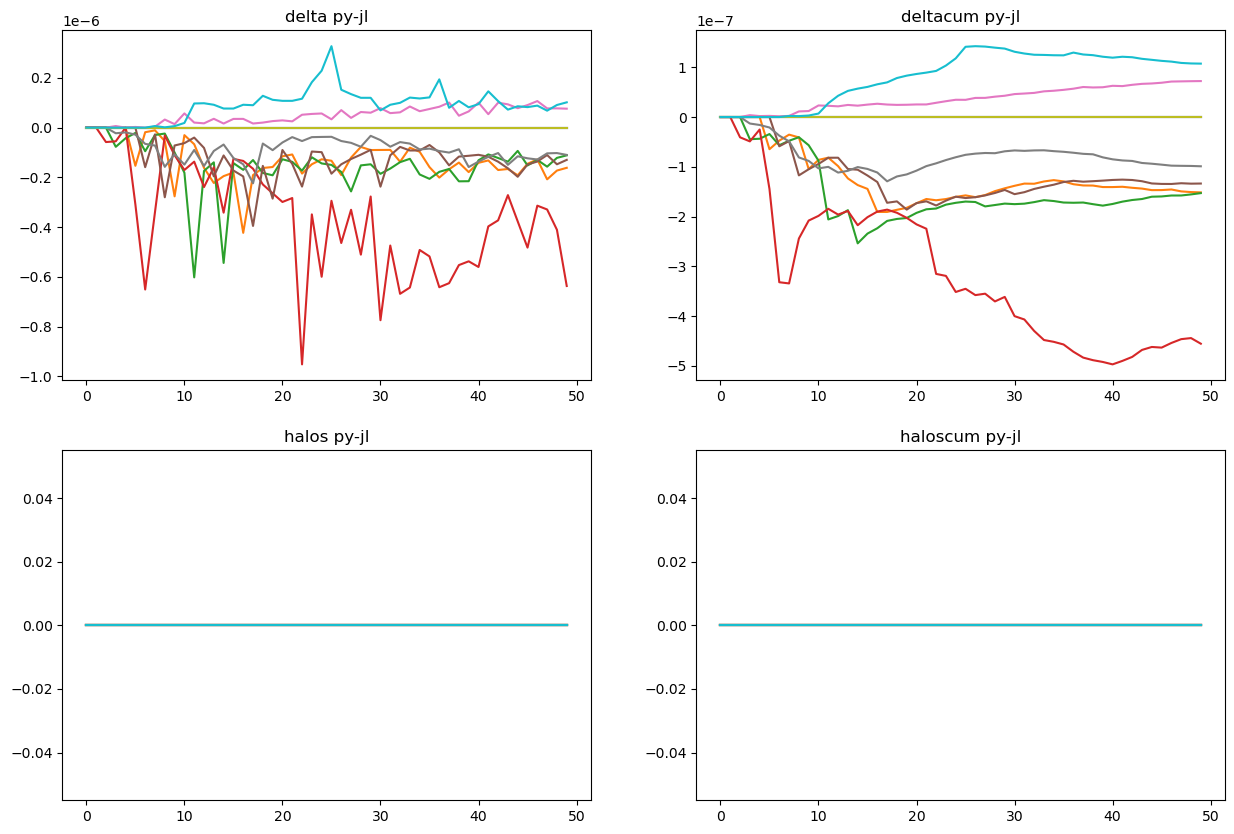

In [169]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
for i in range(10):
    for j,ax in enumerate(axs.flat):
        ax.plot(profs_py[i][cls[j]] - profs_jl[i][cls[j]], label=profs_py[0].columns[j])

axs[0,0].set_title('delta py-jl')
axs[0,1].set_title('deltacum py-jl')
axs[1,0].set_title('halos py-jl')
axs[1,1].set_title('haloscum py-jl')

In [175]:
### py
mass  = np.zeros(NBINS)
halos = np.zeros(NBINS)
massball  = 0.0
halosball = 0.0

for p in ppy.values():
    mass += p.m
    halos += p.nh
    massball += p.mball
    halosball += p.nhball

meandenball   = (massball/(4*np.pi/3 * (5*RMAX)**3))
meanhalosball = (halosball/(4*np.pi/3 * (5*RMAX)**3))

DR = (RMAX-RMIN)/NBINS

vol    = np.zeros(NBINS)
volcum = np.zeros(NBINS)
for k in range(NBINS):
    vol[k]    = ((k+1.0)*DR + RMIN)**3 - (k*DR + RMIN)**3
    volcum[k] = ((k+1.0)*DR + RMIN)**3

vol    *= (4*np.pi/3)
volcum *= (4*np.pi/3)

Delta    = np.zeros(NBINS)
DeltaCum = np.zeros(NBINS)
DeltaHalos    = np.zeros(NBINS)
DeltaHalosCum = np.zeros(NBINS)

Delta_py    = (mass/vol)/meandenball - 1
DeltaCum_py = (np.cumsum(mass)/volcum)/meandenball - 1
DeltaHalos_py    = (halos/vol)/meanhalosball - 1
DeltaHalosCum_py = (np.cumsum(halos)/volcum)/meanhalosball - 1

In [176]:
### jl
mass  = np.zeros(NBINS)
halos = np.zeros(NBINS)
massball  = 0.0
halosball = 0.0

for p in pjl.values():
    mass += p.m
    halos += p.nh
    massball += p.mball
    halosball += p.nhball

meandenball   = (massball/(4*np.pi/3 * (5*RMAX)**3))
meanhalosball = (halosball/(4*np.pi/3 * (5*RMAX)**3))

DR = (RMAX-RMIN)/NBINS

vol    = np.zeros(NBINS)
volcum = np.zeros(NBINS)
for k in range(NBINS):
    vol[k]    = ((k+1.0)*DR + RMIN)**3 - (k*DR + RMIN)**3
    volcum[k] = ((k+1.0)*DR + RMIN)**3

vol    *= (4*np.pi/3)
volcum *= (4*np.pi/3)

Delta    = np.zeros(NBINS)
DeltaCum = np.zeros(NBINS)
DeltaHalos    = np.zeros(NBINS)
DeltaHalosCum = np.zeros(NBINS)

Delta_jl    = (mass/vol)/meandenball - 1
DeltaCum_jl = (np.cumsum(mass)/volcum)/meandenball - 1
DeltaHalos_jl    = (halos/vol)/meanhalosball - 1
DeltaHalosCum_jl = (np.cumsum(halos)/volcum)/meanhalosball - 1

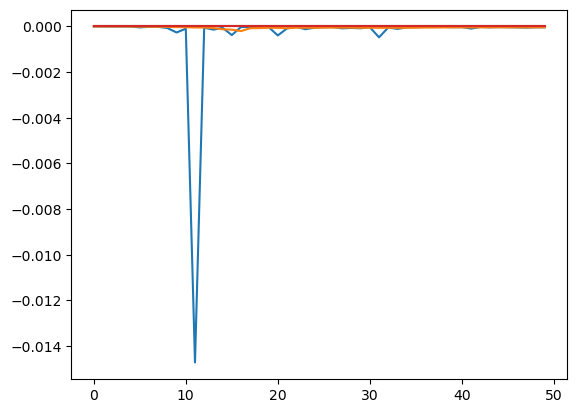

In [184]:
plt.plot((Delta_py-Delta_jl)/abs(Delta_jl)*100)
plt.plot((DeltaCum_py-DeltaCum_jl)/abs(DeltaCum_jl)*100)
plt.plot((DeltaHalos_py-DeltaHalos_jl)/abs(DeltaHalos_jl)*100)
plt.plot((DeltaHalosCum_py-DeltaHalosCum_jl)/abs(DeltaHalosCum_jl)*100)

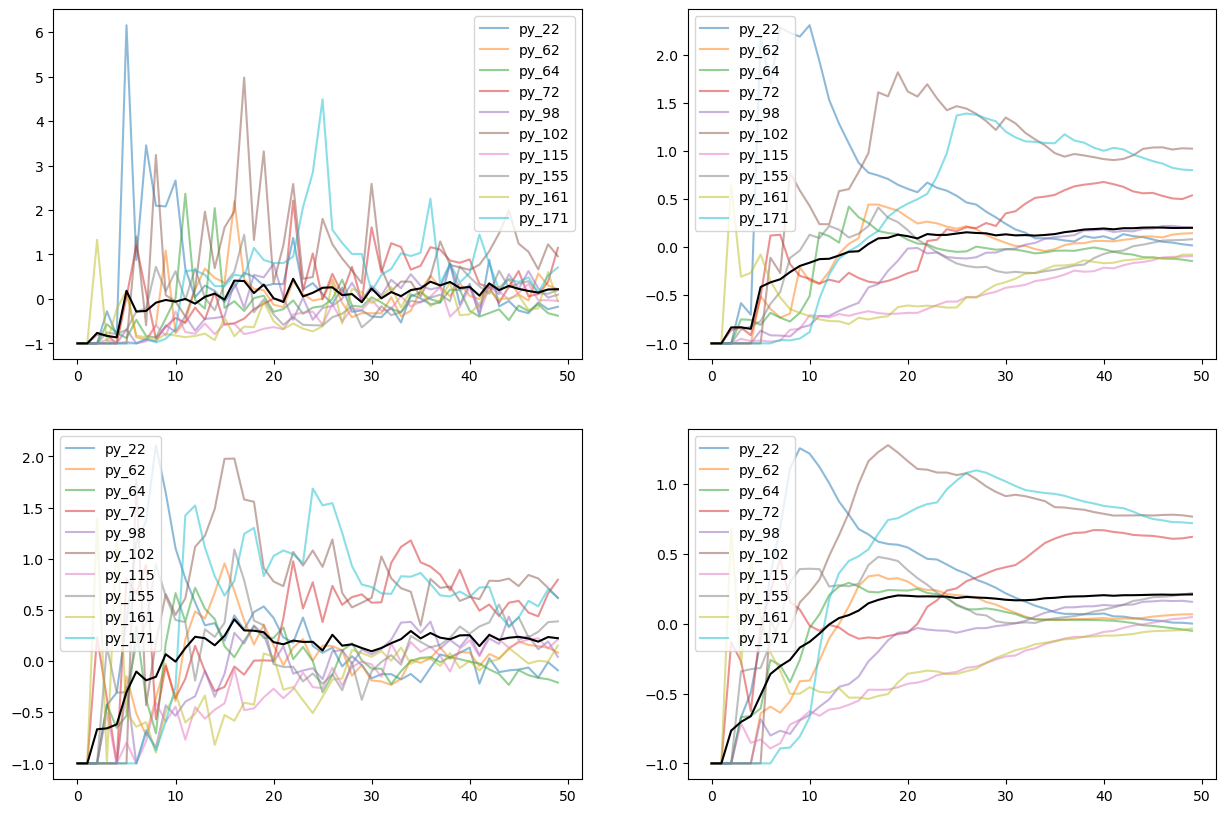

In [193]:
colores = ['C0', 'C1', 'C2', 'C3']
fig, axs = plt.subplots(2,2, figsize=(15,10))
for i,key in enumerate(ppy.keys()):
    for j,ax in enumerate(axs.flat):
        ax.plot(profs_py[i][cls[j]], label=key, alpha=0.5)
        ax.legend()

axs[0,0].plot(Delta_py, c='k')
axs[0,1].plot(DeltaCum_py, c='k')
axs[1,0].plot(DeltaHalos_py, c='k')
axs[1,1].plot(DeltaHalosCum_py, c='k')
# axs[0,0].plot(Delta_jl, c='r')

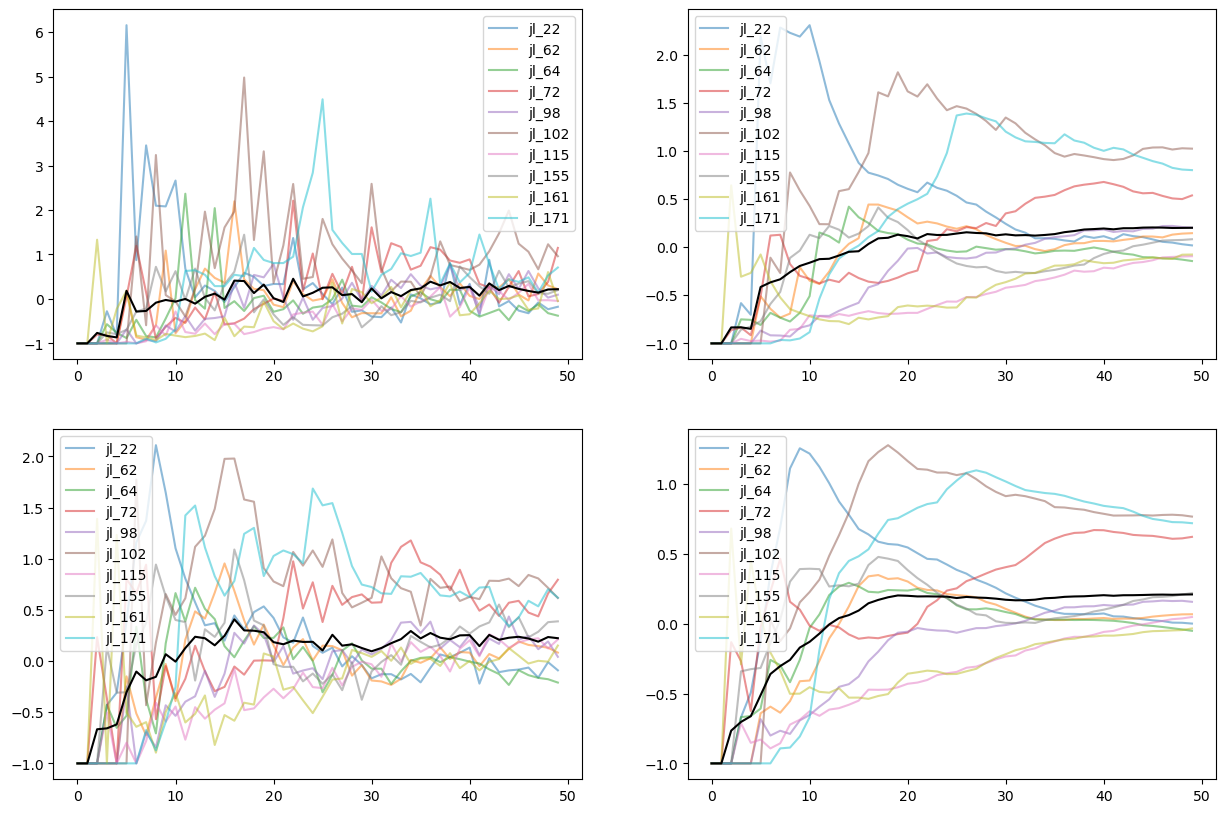

In [192]:
colores = ['C0', 'C1', 'C2', 'C3']
fig, axs = plt.subplots(2,2, figsize=(15,10))
for i,key in enumerate(pjl.keys()):
    for j,ax in enumerate(axs.flat):
        ax.plot(profs_jl[i][cls[j]], label=key, alpha=0.5)
        ax.legend()

axs[0,0].plot(Delta_jl, c='k')
axs[0,1].plot(DeltaCum_jl, c='k')
axs[1,0].plot(DeltaHalos_jl, c='k')
axs[1,1].plot(DeltaHalosCum_jl, c='k')
# axs[0,0].plot(Delta_jl, c='r')